<a href="https://colab.research.google.com/github/Bruna298/Bruna298/blob/main/ANP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Preços semestrais - AUTOMOTIVOS_2024.01.csv', sep = ';')
df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,GASOLINA,01/01/2024,"5,68",NaN,R$ / litro,VIBRA
1,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,GASOLINA ADITIVADA,01/01/2024,"5,68",NaN,R$ / litro,VIBRA
2,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,DIESEL S10,01/01/2024,"5,93",NaN,R$ / litro,VIBRA
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,ETANOL,01/01/2024,"3,99",NaN,R$ / litro,VIBRA
4,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,12.706.529/0001-04,RUA SAO FRANCISCO,274,NaN,CENTRO,57300-080,GASOLINA,01/01/2024,"5,48",NaN,R$ / litro,VIBRA


In [ ]:
for i in df.columns:
  print(i)


Regiao - Sigla
Estado - Sigla
Municipio
Revenda
CNPJ da Revenda
Nome da Rua
Numero Rua
Complemento
Bairro
Cep
Produto
Data da Coleta
Valor de Venda
Valor de Compra
Unidade de Medida
Bandeira


In [ ]:
print(type(df['Valor de Venda'][0]))

<class 'str'>


In [ ]:
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',','.')
df['Valor de Venda'] = df['Valor de Venda'].astype(float)

In [ ]:
print(type(df['Valor de Venda'][0]))

<class 'numpy.float64'>


In [ ]:
df_estados = df[['Estado - Sigla','Valor de Venda']].groupby('Estado - Sigla').mean().reset_index()
df_estados.head()

,Estado - Sigla,Valor de Venda
0,AC,6.871982
1,AL,5.541569
2,AM,6.048142
3,AP,5.996037
4,BA,5.639563


In [ ]:
df_gasolina = df[df['Produto'] == 'GASOLINA']
df_etanol = df[df['Produto'] == 'ETANOL']
df_diesel = df[df['Produto'] == 'DIESEL']
df_etanol.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL-220,1901,NaN,SANTA ESMERALDA,57312-025,ETANOL,01/01/2024,3.99,NaN,R$ / litro,VIBRA
9,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0001-58,RODOVIA AL-110,678,KM 70,CANAFISTULA,57302-802,ETANOL,01/01/2024,3.99,NaN,R$ / litro,BRANCA
13,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0002-39,"AVENIDA EMIDIO DE LIMA,",23,NaN,JARDIM ESPERANCA,57307-350,ETANOL,01/01/2024,3.99,NaN,R$ / litro,IPIRANGA
17,NE,AL,RIO LARGO,CDA EMPREENDIMENTOS LTDA,12.486.809/0004-05,RODOVIA BR 104 AL. KM 86,SN,NaN,MATA DO ROLO,57100-000,ETANOL,01/01/2024,3.99,NaN,R$ / litro,VIBRA
20,NE,AL,RIO LARGO,OLIVEIRA & FREITAS LTDA,01.600.494/0001-08,LOTEAMENTO VILA RICA,S/N,LOTE 12 QUADRAB,MATA DO ROLO,57100-000,ETANOL,01/01/2024,3.99,NaN,R$ / litro,IPIRANGA


In [ ]:
df_rj_gasolina = df[(df['Estado - Sigla'] == 'RJ') & (df['Produto'] == 'GASOLINA')]
df_rj_diesels10 = df.query('`Estado - Sigla` == "RJ"  and `Produto` == "DIESEL S10" ')
df_rj_etanol = df[(df['Estado - Sigla'] == 'RJ') & (df['Produto'] == 'ETANOL')]
df_rj_diesel = df[(df['Estado - Sigla'] == 'RJ') & (df['Produto'] == 'DIESEL')]
df_rj_diesels10.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
124,SE,RJ,CAMPOS DOS GOYTACAZES,POSTO DE COMBUSTIVEIS CONTORNO DE CAMPOS LTDA,31.212.889/0002-85,AVENIDA NILO PECANHA,614,/822 PATIO,PQ SANTO AMARO,28030-035,DIESEL S10,01/01/2024,6.29,NaN,R$ / litro,VIBRA
127,SE,RJ,CAMPOS DOS GOYTACAZES,ARARA FLUMINENSE COMERCIO DE COMBUSTIVEIS LTDA.,07.614.346/0004-71,AVENIDA ALBERTO TORRES,100,NaN,CENTRO,28010-117,DIESEL S10,01/01/2024,6.09,NaN,R$ / litro,RAIZEN
137,SE,RJ,CAMPOS DOS GOYTACAZES,G.S. NOGUEIRA COMBUSTÍVEIS LTDA,03.784.646/0001-03,RUA JOAQUIM LORENA,6,NaN,URURAÍ,28020-230,DIESEL S10,01/01/2024,5.99,NaN,R$ / litro,BRANCA
142,SE,RJ,CAMPOS DOS GOYTACAZES,CAMPOS GAROUPA LTDA.,03.581.079/0002-60,AVENIDA 15 DE NOVEMBRO,353,NaN,CENTRO,28030-002,DIESEL S10,01/01/2024,5.99,NaN,R$ / litro,BRANCA
147,SE,RJ,CAMPOS DOS GOYTACAZES,REDE ENERGIA LTDA,03.433.342/0001-93,RUA ALBERTO LAMEGO,895/,905,CENTRO,28015-622,DIESEL S10,01/01/2024,5.99,NaN,R$ / litro,BRANCA


In [ ]:
df_rj_diesels10 = df.query('`Estado - Sigla` == "RJ"  and `Produto` == "DIESEL S10" ')

In [ ]:
df_estados_gasolina = df_gasolina[['Estado - Sigla','Valor de Venda']].groupby('Estado - Sigla').mean().reset_index()
df_estados_gasolina['Valor de Venda'] = df_estados_gasolina['Valor de Venda'].round(2)
df_estados_gasolina = df_estados_gasolina.sort_values(by='Valor de Venda', ascending=False)
display(df_estados_gasolina.head())

,Estado - Sigla,Valor de Venda
0,AC,6.99
2,AM,6.44
20,RO,6.39
21,RR,6.10
19,RN,6.07


## 1. Distância <= |10%|: Indica que a média tende a ser uma medida de tendência central confiável
## 2. Distância >= |10%| e Distância < |25%|: Indica que a média está sofrendo moderadamente a influência dos valores extremos da distribuição dos dados e, com isso, pode ser que seja (ou não) uma medida de tendência central confiável(precisará analisar outras medidas que no futuro serão apresentadas)
## 3. Distância >=|25%|: Indica que a média está sofrendo alta a influência dos valores extremos da distribuição dos dados e,com isso, tende a não ser uma medida de tendência central confiável (precisará analisar outra medidas que no futuro serão apresentadas)

In [ ]:
array_estados_gasolina = np.array(df_estados_gasolina['Valor de Venda'])
maximo = np.max(array_estados_gasolina)
minimo = np.min(array_estados_gasolina)
media = np.mean(array_estados_gasolina)
mediana = np.median(array_estados_gasolina)
distancia = (media-mediana)/mediana
q1 = np.quantile(array_estados_gasolina, 0.25)
q3 = np.quantile(array_estados_gasolina, 0.75)
iqr = q3 - q1
limite_inferior = q1 - (1.5 * iqr)
limite_superior = q3 + (1.5 * iqr)
print(f'Mínimo: {minimo}')
print(f'Limite Inferior: {limite_inferior}')
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Distância: {round(distancia * 100 , 2)}%')
print(f'Q1: {q1}')
print(f'Q3: {q3}')
print(f'IQR: {iqr}')
print(f'Máximo: {maximo}')
print(f'Limite Superior: {limite_superior}')

Mínimo: 5.57
Limite Inferior: 5.417499999999999
Média: 5.914074074074073
Mediana: 5.86
Distância: 0.92%
Q1: 5.755
Q3: 5.98
IQR: 0.22500000000000053
Máximo: 6.99
Limite Superior: 6.317500000000001


In [ ]:
# Outlier
estados_gasolina_outliers = df_estados_gasolina[df_estados_gasolina['Valor de Venda'] > limite_inferior]
estados_gasolina_outliers

,Estado - Sigla,Valor de Venda
0,AC,6.99
2,AM,6.44
20,RO,6.39
21,RR,6.10
19,RN,6.07
4,BA,6.06
24,SE,6.00
13,PA,5.96
5,CE,5.95
1,AL,5.91


In [ ]:
# Gráfico com pandas

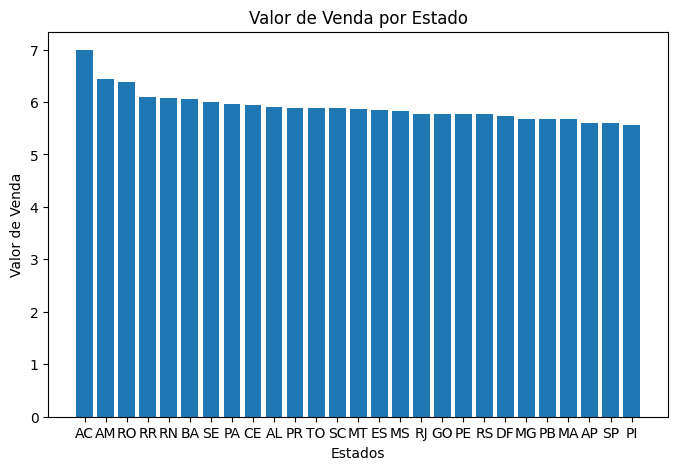

In [ ]:
# Com Matplot
plt.figure(figsize=(8, 5))
plt.bar(df_estados_gasolina['Estado - Sigla'], df_estados_gasolina['Valor de Venda'])
plt.xlabel('Estados')
plt.ylabel('Valor de Venda')
plt.title('Valor de Venda por Estado')
plt.show()

Text(0.5, 1.0, 'Valor de Venda por Estado')

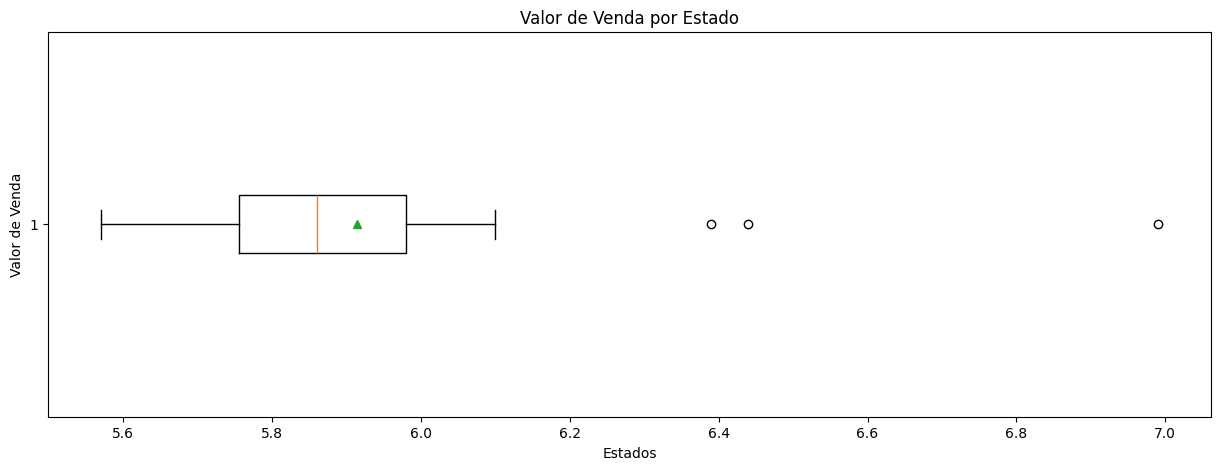

In [ ]:
# Com Matplot boxplot
plt.figure(figsize=(15, 5))
plt.boxplot(array_estados_gasolina, vert = False, showmeans= True)
plt.xlabel('Estados')
plt.ylabel('Valor de Venda')
plt.title('Valor de Venda por Estado')

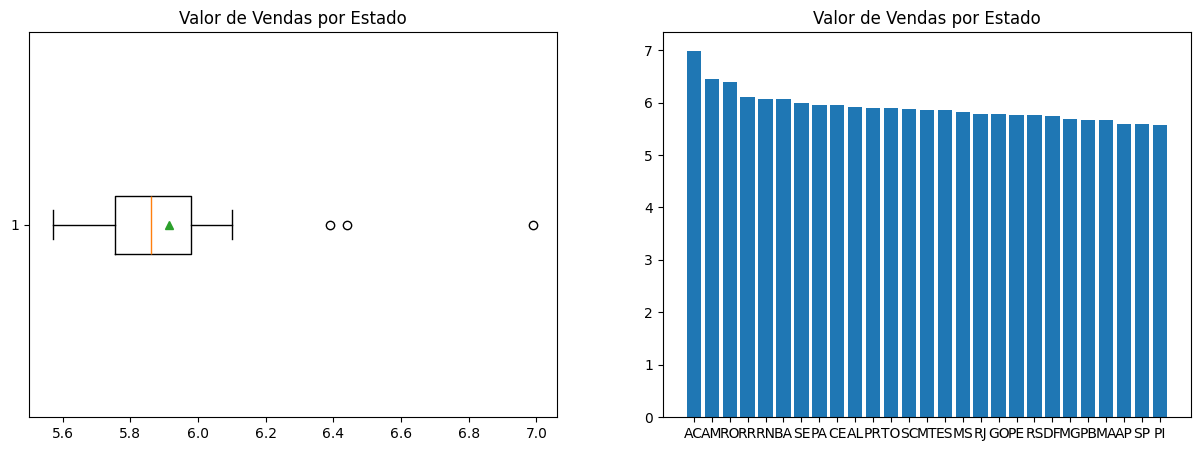

In [ ]:
# subplots com matplot
plt.subplots(1, 2, figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(array_estados_gasolina, vert = False, showmeans= True)
plt.title('Valor de Vendas por Estado')


plt.subplot(1, 2, 2)
plt.bar(estados_gasolina_outliers['Estado - Sigla'], estados_gasolina_outliers['Valor de Venda'])
plt.title('Valor de Vendas por Estado')

plt.show()


In [ ]:
df_estados_etanol = df_etanol[['Estado - Sigla','Valor de Venda']].groupby('Estado - Sigla').mean().reset_index()
df_estados_etanol['Valor de Venda'] = df_estados_etanol['Valor de Venda'].round(2)
display(df_estados_etanol.head())

,Estado - Sigla,Valor de Venda
0,AC,4.86
1,AL,4.30
2,AM,4.31
3,AP,4.98
4,BA,4.36


In [ ]:
df_estados_diesel = df_diesel[['Estado - Sigla','Valor de Venda']].groupby('Estado - Sigla').mean().reset_index()
df_estados_diesel['Valor de Venda'] = df_estados_diesel['Valor de Venda'].round(2)
display(df_estados_diesel.head())

,Estado - Sigla,Valor de Venda
0,AC,7.30
1,AL,6.39
2,AM,6.46
3,AP,6.40
4,BA,5.95


In [ ]:
df_rj_gasolina = df.query('`Estado - Sigla` == "RJ"  and `Produto` == "GASOLINA"')
#df_rj_gasolina = df[(df['Estado - Sigla'] == 'RJ') & (df['Produto'] == 'GASOLINA')]
df_munic_rj_gasolina = df_rj_gasolina[['Municipio','Valor de Venda']].groupby('Municipio').mean().reset_index()
df_munic_rj_gasolina['Valor de Venda'] = df_munic_rj_gasolina['Valor de Venda'].round(2)
df_munic_rj_gasolina = df_munic_rj_gasolina.sort_values(by='Valor de Venda', ascending=False)
display(df_munic_rj_gasolina.head())


,Municipio,Valor de Venda
29,TRES RIOS,6.40
18,PETROPOLIS,6.34
0,ANGRA DOS REIS,6.27
23,SAO FRANCISCO DE ITABAPOANA,6.21
2,BARRA DO PIRAI,6.15


In [ ]:
df_rj_etanol = df[(df['Estado - Sigla'] == 'RJ') & (df['Produto'] == 'ETANOL')]
df_munic_rj_etanol = df_rj_etanol[['Municipio','Valor de Venda']].groupby('Municipio').mean().reset_index()
df_munic_rj_etanol['Valor de Venda'] = df_munic_rj_etanol['Valor de Venda'].round(2)
df_munic_rj_etanol = df_munic_rj_etanol.sort_values(by='Valor de Venda', ascending=False)
display(df_munic_rj_etanol.head())

,Municipio,Valor de Venda
18,PETROPOLIS,4.93
29,TRES RIOS,4.92
0,ANGRA DOS REIS,4.82
2,BARRA DO PIRAI,4.58
26,SAPUCAIA,4.50


In [ ]:
df_rj_DIESEL = df[(df['Estado - Sigla'] == 'RJ') & (df['Produto'] == 'DIESEL')]
df_munic_rj_DIESEL = df_rj_DIESEL[['Municipio','Valor de Venda']].groupby('Municipio').mean().reset_index()
df_munic_rj_DIESEL['Valor de Venda'] = df_munic_rj_DIESEL['Valor de Venda'].round(2)
df_munic_rj_DIESEL = df_munic_rj_DIESEL.sort_values(by='Valor de Venda', ascending=False)
display(df_munic_rj_DIESEL.head())

,Municipio,Valor de Venda
0,ANGRA DOS REIS,6.73
11,MACAE,6.70
2,BARRA DO PIRAI,6.52
26,SAQUAREMA,6.37
1,ARARUAMA,6.35


Aula dia 08.11.24

Analise ANP
Análise de padrões :
 * Investigue se há algum bairro no municipio do Rio de Janeiro que esteje praticando valores fora do padrão em relação aos outros,justificando suas conclusões com dados relevantes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df_rj_DIESEL = df_rj_DIESEL.rename(columns={'Bairro': 'Bairro'})
df_rj_etanol = df_rj_etanol.rename(columns={'Bairro': 'Bairro'})
df_rj_gasolina = df_rj_gasolina.rename(columns={'Bairro': 'Bairro'})
df_rj_DIESEL.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
132,SE,RJ,CAMPOS DOS GOYTACAZES,POSTO SAO LUCAS DE CAMPOS LTDA,04.718.173/0001-09,"RODOVIA BR-101 KM 80,5",S/N,NaN,IBITIOCA,28120-000,DIESEL,01/01/2024,5.64,NaN,R$ / litro,RAIZEN
146,SE,RJ,CAMPOS DOS GOYTACAZES,REDE ENERGIA LTDA,03.433.342/0001-93,RUA ALBERTO LAMEGO,895/,905,CENTRO,28015-622,DIESEL,01/01/2024,5.89,NaN,R$ / litro,BRANCA
159,SE,RJ,NOVA IGUACU,POSTO DE GASOLINA SIRIQUISAMBA LTDA.,07.106.399/0001-39,AVENIDA GOVERNADOR ROBERTO SILVEIRA,1500,NaN,MOQUETA,26020-740,DIESEL,01/01/2024,5.77,NaN,R$ / litro,BRANCA
174,SE,RJ,NOVA IGUACU,AUTO POSTO LEAO DE IGUACU LTDA,00.488.282/0001-18,AVENIDA ABILIO AUGUSTO TAVORA,4124,NaN,CABUCU,26262-020,DIESEL,01/01/2024,6.12,NaN,R$ / litro,RAIZEN
197,SE,RJ,SAO JOAO DE MERITI,POSTO F M DA DUTRA LTDA,03.971.151/0001-85,RODOVIA PRESIDENTE DUTRA,S/N,"KM 8,75",COELHO DA ROCHA,25570-720,DIESEL,01/01/2024,6.23,NaN,R$ / litro,RAIZEN
